Chargement du dataset Iris...
Aperçu des données Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
Dimensions du dataset: (150, 4)
Nombre réel d'espèces dans le dataset: 3 (setosa, versicolor, virginica)

Normalisation des données...

=== Détermination du nombre optimal de clusters ===


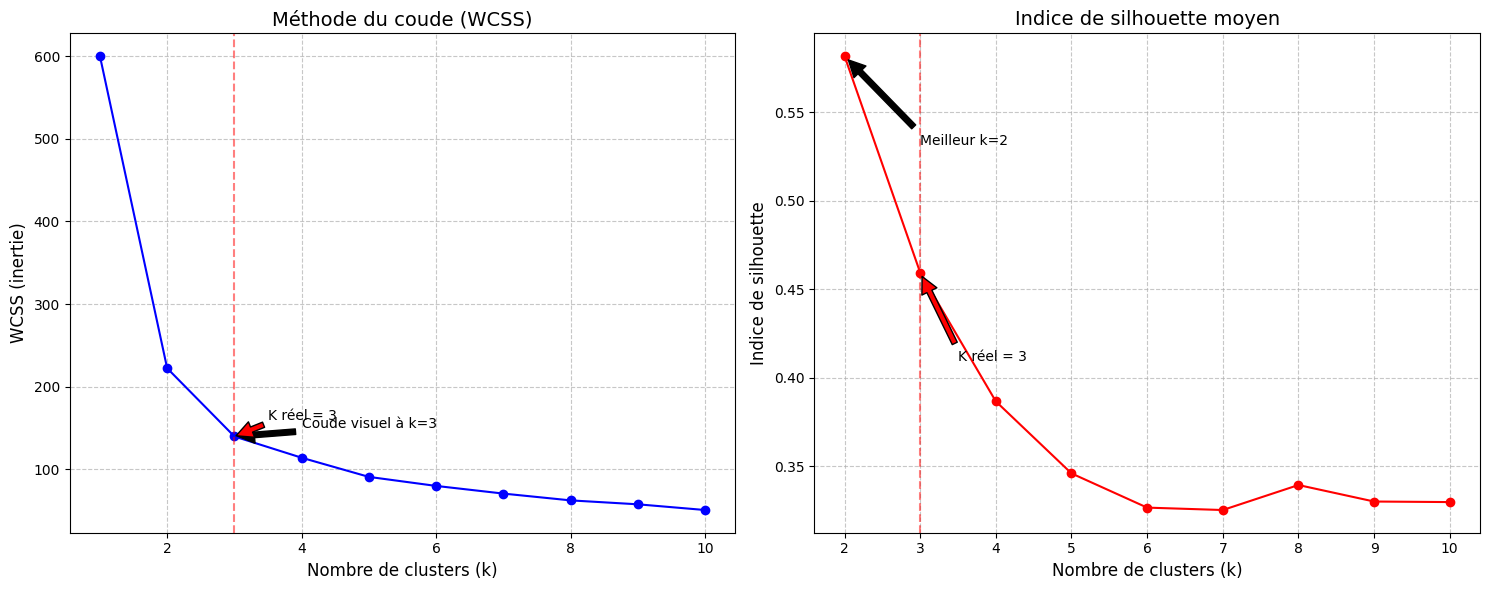


Résultats de l'analyse:
K | WCSS (inertie) | Silhouette
----------------------------------------
1 | 600.00 | 0.0000
2 | 222.36 | 0.5818
3 | 139.83 | 0.4594
4 | 114.10 | 0.3866
5 | 90.93 | 0.3459
6 | 80.00 | 0.3266
7 | 70.73 | 0.3252
8 | 62.51 | 0.3393
9 | 57.76 | 0.3300
10 | 50.85 | 0.3297

Méthode du coude: K optimal = 3
Méthode de la silhouette: K optimal = 2
Nombre réel d'espèces: 3
La méthode du coude identifie correctement le nombre réel d'espèces (K=3).
La méthode de la silhouette suggère K=2, ce qui diffère du nombre réel.
Nous retenons K=3 basé sur la connaissance du dataset et la méthode du coude.

Nombre optimal de clusters retenu: K=3

=== Comparaison entre K-means standard et K-means++ pour K = 3 ===

Comparaison des métriques entre K-means standard et K-means++:
     Métrique  K-means standard   K-means++  Différence
0         ARI          0.610073    0.620135    0.010062
1     Inertie        139.825435  139.820496   -0.004938
2  Silhouette          0.459378    0.459948 

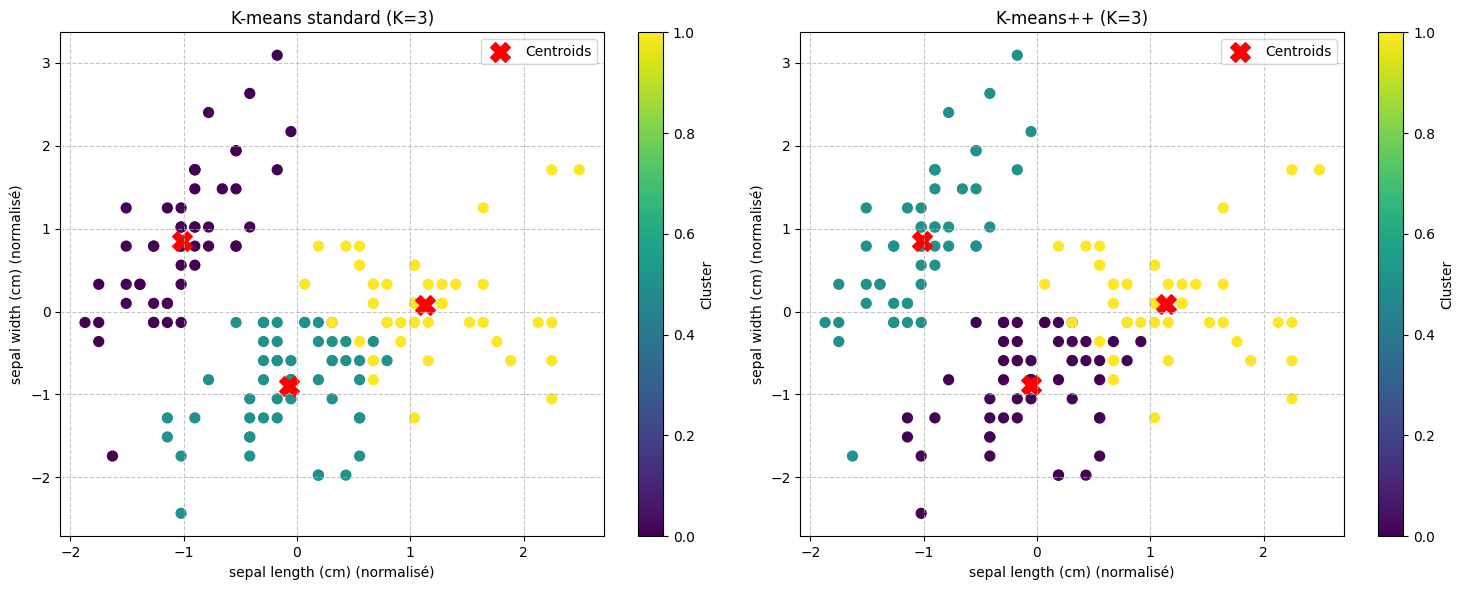


Analyse de la convergence:
Nombre d'itérations pour K-means standard: 5
Nombre d'itérations pour K-means++: 4
Différence: 1 itérations

Distribution des espèces dans chaque cluster:
K-means standard:
Species   0   1   2
Cluster            
0        50   0   0
1         0  38  14
2         0  12  36

K-means++:
Species   0   1   2
Cluster            
0         0  39  14
1        50   0   0
2         0  11  36

Analyse de la stabilité avec différents random_states:

K-means standard - Statistiques:
       Random State    K       ARI     Inertie  Silhouette  Iterations
count      5.000000  5.0  5.000000    5.000000    5.000000    5.000000
mean      20.400000  3.0  0.618191  140.173911    0.459840    5.800000
std       16.456002  0.0  0.025437    0.419115    0.003230    1.788854
min        0.000000  3.0  0.592333  139.820496    0.456535    4.000000
25%       10.000000  3.0  0.592333  140.032753    0.456634    4.000000
50%       20.000000  3.0  0.620135  140.032753    0.459948    6.000000


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans

# 1. Charger le dataset Iris
print("Chargement du dataset Iris...")
iris = load_iris()
X = iris.data
y_true = iris.target

# Créer un DataFrame pour une meilleure visualisation des données
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
print("Aperçu des données Iris:")
print(iris_df.head())
print(f"Dimensions du dataset: {X.shape}")
print(f"Nombre réel d'espèces dans le dataset: 3 (setosa, versicolor, virginica)")

# 2. Normaliser les données
print("\nNormalisation des données...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Détermination du nombre de clusters par la méthode du coude et de la silhouette
print("\n=== Détermination du nombre optimal de clusters ===")
wcss = []  # Within-Cluster Sum of Squares (WCSS) ou inertie
silhouette_scores = []  # Scores de silhouette pour chaque K
k_range = range(1, 11)  # Tester de 1 à 10 clusters

# Calculer l'inertie et le score de silhouette pour différentes valeurs de K
for k in k_range:
    # Utiliser scikit-learn KMeans standard pour calculer les métriques
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # Calculer le score de silhouette (pas disponible pour k=1)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)  # Silhouette non définie pour k=1

# Tracer les deux métriques en fonction de K
plt.figure(figsize=(15, 6))

# Méthode du coude
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.title('Méthode du coude (WCSS)', fontsize=14)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('WCSS (inertie)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

coude_k = 3  # inspection visuelle du graphique

plt.annotate(f'Coude visuel à k={coude_k}',
             xy=(coude_k, wcss[coude_k-1]),
             xytext=(coude_k+1, wcss[coude_k-1]+10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Ajouter une référence pour K=3 (nombre réel d'espèces)
plt.axvline(x=3, color='r', linestyle='--', alpha=0.5)
plt.annotate('K réel = 3',
             xy=(3, wcss[2]),
             xytext=(3.5, wcss[2]+20),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Indice de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # Commencer à k=2
plt.title('Indice de silhouette moyen', fontsize=14)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Indice de silhouette', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Identifier le k avec le meilleur score de silhouette
best_silhouette_k = np.argmax(silhouette_scores[1:]) + 2  # +2 car on commence à k=2

plt.annotate(f'Meilleur k={best_silhouette_k}',
             xy=(best_silhouette_k, silhouette_scores[best_silhouette_k-1]),
             xytext=(best_silhouette_k+1, silhouette_scores[best_silhouette_k-1]-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Ajouter une référence pour K=3 (nombre réel d'espèces)
plt.axvline(x=3, color='r', linestyle='--', alpha=0.5)
plt.annotate('K réel = 3',
             xy=(3, silhouette_scores[2]),
             xytext=(3.5, silhouette_scores[2]-0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.tight_layout()
plt.savefig('iris_elbow_silhouette_method.png')
plt.show()

# Résultats numériques et analyse
print("\nRésultats de l'analyse:")
print("K | WCSS (inertie) | Silhouette")
print("-" * 40)
for k in k_range:
    print(f"{k} | {wcss[k-1]:.2f} | {silhouette_scores[k-1]:.4f}")

print(f"\nMéthode du coude: K optimal = {coude_k}")
print(f"Méthode de la silhouette: K optimal = {best_silhouette_k}")
print(f"Nombre réel d'espèces: 3")

# Analyse des résultats et comparaison avec le nombre réel d'espèces
if coude_k == 3 and best_silhouette_k == 3:
    print("Les deux méthodes identifient correctement le nombre réel d'espèces (K=3).")
    optimal_k = 3
elif coude_k == 3:
    print("La méthode du coude identifie correctement le nombre réel d'espèces (K=3).")
    print(f"La méthode de la silhouette suggère K={best_silhouette_k}, ce qui diffère du nombre réel.")
    print("Nous retenons K=3 basé sur la connaissance du dataset et la méthode du coude.")
    optimal_k = 3
elif best_silhouette_k == 3:
    print("La méthode de la silhouette identifie correctement le nombre réel d'espèces (K=3).")
    print(f"La méthode du coude suggère K={coude_k}, ce qui diffère du nombre réel.")
    print("Nous retenons K=3 basé sur la connaissance du dataset et la méthode de la silhouette.")
    optimal_k = 3
else:
    print(f"Ni la méthode du coude (K={coude_k}) ni la méthode de la silhouette (K={best_silhouette_k}) n'identifient correctement le nombre réel d'espèces (K=3).")
    print("Pour ce dataset, nous savons qu'il y a 3 espèces, donc nous retenons K=3.")
    optimal_k = 3

print(f"\nNombre optimal de clusters retenu: K={optimal_k}")

# 4. Comparer K-means standard et K-means++ avec le nombre optimal de clusters
print("\n=== Comparaison entre K-means standard et K-means++ pour K =", optimal_k, "===")

# Initialiser les modèles
kmeans_standard = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, init='random')
kmeans_plus_plus = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, init='k-means++')

# Entraîner les modèles
kmeans_standard.fit(X_scaled)
kmeans_plus_plus.fit(X_scaled)

# Calculer les métriques d'évaluation
std_labels = kmeans_standard.labels_
pp_labels = kmeans_plus_plus.labels_

std_ari = adjusted_rand_score(y_true, std_labels)
pp_ari = adjusted_rand_score(y_true, pp_labels)

std_inertia = kmeans_standard.inertia_
pp_inertia = kmeans_plus_plus.inertia_

std_silhouette = silhouette_score(X_scaled, std_labels)
pp_silhouette = silhouette_score(X_scaled, pp_labels)

# Stocker les résultats dans un DataFrame pour une meilleure visualisation
results = pd.DataFrame({
    'Métrique': ['ARI', 'Inertie', 'Silhouette'],
    'K-means standard': [std_ari, std_inertia, std_silhouette],
    'K-means++': [pp_ari, pp_inertia, pp_silhouette],
    'Différence': [pp_ari - std_ari, pp_inertia - std_inertia, pp_silhouette - std_silhouette]
})

print("\nComparaison des métriques entre K-means standard et K-means++:")
print(results)

# 5. Visualiser les clusters pour les deux méthodes
plt.figure(figsize=(15, 6))

# K-means standard
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=std_labels, cmap='viridis', s=50)
plt.scatter(kmeans_standard.cluster_centers_[:, 0], kmeans_standard.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means standard (K={optimal_k})')
plt.xlabel(f"{iris.feature_names[0]} (normalisé)")
plt.ylabel(f"{iris.feature_names[1]} (normalisé)")
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# K-means++
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pp_labels, cmap='viridis', s=50)
plt.scatter(kmeans_plus_plus.cluster_centers_[:, 0], kmeans_plus_plus.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means++ (K={optimal_k})')
plt.xlabel(f"{iris.feature_names[0]} (normalisé)")
plt.ylabel(f"{iris.feature_names[1]} (normalisé)")
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('iris_kmeans_comparison.png')
plt.show()

# 6. Analyser les différences de convergence (nombre d'itérations)
print("\nAnalyse de la convergence:")
print(f"Nombre d'itérations pour K-means standard: {kmeans_standard.n_iter_}")
print(f"Nombre d'itérations pour K-means++: {kmeans_plus_plus.n_iter_}")
print(f"Différence: {kmeans_standard.n_iter_ - kmeans_plus_plus.n_iter_} itérations")

# 7. Analyser la distribution des espèces réelles dans chaque cluster
print("\nDistribution des espèces dans chaque cluster:")

print("K-means standard:")
std_cluster_species = pd.DataFrame({
    'Cluster': std_labels,
    'Species': y_true
})
std_distribution = pd.crosstab(
    std_cluster_species['Cluster'],
    std_cluster_species['Species'],
    rownames=['Cluster'],
    colnames=['Species']
)
print(std_distribution)

print("\nK-means++:")
pp_cluster_species = pd.DataFrame({
    'Cluster': pp_labels,
    'Species': y_true
})
pp_distribution = pd.crosstab(
    pp_cluster_species['Cluster'],
    pp_cluster_species['Species'],
    rownames=['Cluster'],
    colnames=['Species']
)
print(pp_distribution)

# 8. Analyser la position des centroides initiaux et finaux pour K-means++
# Pour cette partie, il faudrait exécuter à nouveau avec un random_state différent
# et comparer la stabilité des résultats
k_values = [optimal_k]
random_states = [42, 0, 10, 20, 30]

std_metrics = []
pp_metrics = []

for rs in random_states:
    for k in k_values:
        # K-means standard
        kmeans_std = KMeans(n_clusters=k, random_state=rs, n_init=1, init='random')
        kmeans_std.fit(X_scaled)

        # K-means++
        kmeans_pp = KMeans(n_clusters=k, random_state=rs, n_init=1, init='k-means++')
        kmeans_pp.fit(X_scaled)

        # Collecter les métriques
        std_metrics.append({
            'Random State': rs,
            'K': k,
            'ARI': adjusted_rand_score(y_true, kmeans_std.labels_),
            'Inertie': kmeans_std.inertia_,
            'Silhouette': silhouette_score(X_scaled, kmeans_std.labels_),
            'Iterations': kmeans_std.n_iter_
        })

        pp_metrics.append({
            'Random State': rs,
            'K': k,
            'ARI': adjusted_rand_score(y_true, kmeans_pp.labels_),
            'Inertie': kmeans_pp.inertia_,
            'Silhouette': silhouette_score(X_scaled, kmeans_pp.labels_),
            'Iterations': kmeans_pp.n_iter_
        })

# Transformer les listes en DataFrames
std_df = pd.DataFrame(std_metrics)
pp_df = pd.DataFrame(pp_metrics)

# Statistiques sur les métriques pour évaluer la stabilité
print("\nAnalyse de la stabilité avec différents random_states:")
print("\nK-means standard - Statistiques:")
print(std_df.describe())

print("\nK-means++ - Statistiques:")
print(pp_df.describe())

# Comparer les écart-types pour évaluer la stabilité
std_stability = std_df[['ARI', 'Inertie', 'Silhouette', 'Iterations']].std()
pp_stability = pp_df[['ARI', 'Inertie', 'Silhouette', 'Iterations']].std()

stability_comparison = pd.DataFrame({
    'Métrique': std_stability.index,
    'Écart-type K-means': std_stability.values,
    'Écart-type K-means++': pp_stability.values,
    'Ratio de stabilité': pp_stability.values / std_stability.values
})

print("\nComparaison de la stabilité (écart-types):")
print(stability_comparison)